<a href="https://colab.research.google.com/github/MayankSinghM/student-score-predictor/blob/main/student_score_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

just practicing : Revising and learnig how the model created for marks prediction

# Project Summary:
- Dataset: Student Scores (Hours Studied vs Marks Scored)
- Model Used: Linear Regression
- Evaluation: R2 Score, MSE
- Key Insight: Positive correlation between study hours and marks.


In [ ]:
# importing library to use different predefine functions and for easy calculation
import numpy as np   # this numpy lirary used for efficient calculation of matrix
import pandas as pd   # this lirary used for data handling and manipulation analysis and cleaning
import matplotlib.pyplot as plt # used for data visualization
from sklearn.linear_model import LinearRegression  # the sklearn package is useful to build different model evaluate them train them and preprocess data


Here we are using the LinearRegression algorithm because we want a straight slope all the output is increasing continuosly in the upper program the sklearn is a package linear_model is a module and LinearRegression is a algorithm or a class.

In [ ]:
data = pd.read_csv('/content/hour.csv')   # in this we have made a variable name data and using pandas library we read all the content in the stored file and stored it in the vaariable so we can directly access it
print(data)  # in this the program recognize the data separately by the commas

   Hours  Marks
0      1     20
1      2     25
2      3     30
3      4     35
4      5     45
5      6     60
6      7     70
7      8     80
8      9     85
9     10     95


In [ ]:
print(data.head()) # it prints first five rows of the data

   Hours  Marks
0      1     20
1      2     25
2      3     30
3      4     35
4      5     45


In [ ]:
print(data.shape)   # it tells about the rows and column in the file

(10, 2)


why 2d form for X and 1d for y;
beacause the machine learning model expect input in 2d shape (rows,feature)

In [ ]:
X = data[['Hours']]   # the data of the hours column stored in 2d form in the X variable
y=data['Marks']        # the data of the Marks column stored in 1d form in the y variable

Feature(s): Hours (what you use to predict)

Target / Label: Marks (what you are trying to predict)

So here:

Hours → is your feature (input)

Marks → is your target or label (output)



In [ ]:
print(X)
print(X.shape)

   Hours
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
(10, 1)


In [ ]:
print(y)
print(y.shape)

0    20
1    25
2    30
3    35
4    45
5    60
6    70
7    80
8    85
9    95
Name: Marks, dtype: int64
(10,)


Train Test Split data Model selection

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Length of X:", len(X))
print("Length of y:", len(y))
print("Train X:", len(X_train))   # Should be 8
print("Test X:", len(X_test))     # Should be 2
print("Train y:", len(y_train))   # Should be 8
print("Test y:", len(y_test))     # Should be 2


Length of X: 10
Length of y: 10
Train X: 8
Test X: 2
Train y: 8
Test y: 2


In [ ]:
model = LinearRegression() # This creates an empty linear regression model.
model.fit(X_train,y_train)  # now by calling the fit function we have provided it the data and now it will trained in the data and find the value of slope m and intercept b


LinearRegression()

In [ ]:
m = model.coef_   # it store the value of slope  Slope (📈 how much y changes per x)
b = model.intercept_   # it store the value of intercept where the line hits y-axis when x=0

In [ ]:
predict_y = model.predict([[4]])  # here we have made a 1d matrix pf predict_y where the value of prediction stored
print(predict_y)   # it is used to print the values
predict_y = model.predict(X_test)
print(predict_y)

[40.86206897]
[85.90517241 22.84482759]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


data visualization:

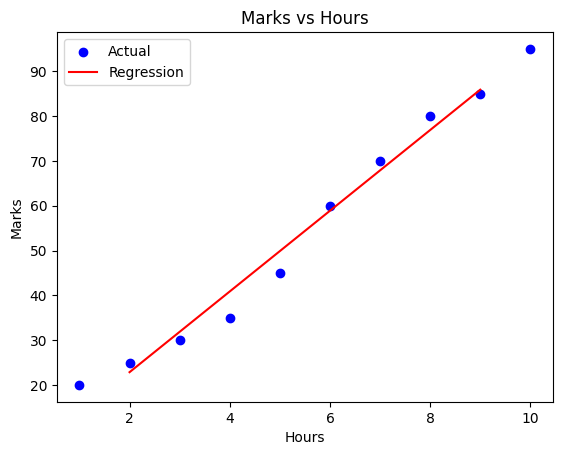

In [ ]:
plt.scatter(X,y,color='blue',label="Actual")  # here we have drawn a scatter plot with the help of input and output data X and y and use the color blue and use lael as name
plt.plot(X_test,model.predict(X_test), color='red',label='Regression') # it is straight line for regression
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Marks vs Hours')
plt.legend()
plt.show()

Model evaluation of the project

1. we evaluate Mse for the project

In [ ]:
from sklearn.metrics import mean_squared_error     #sklearn/          ← Package (folder)
                                                     #   └── metrics.py  ← Module (Python file)
                                                      #         └── mean_squared_error() ← Function inside that file
mse = mean_squared_error(y_test, model.predict(X_test))  # here we assign the value in mse variable after calculating value through the function
print("MSE :" ,mse)
rmse = np.sqrt(mse)
print("RMSE:", round(rmse,2))

MSE : 2.732052615933426
RMSE: 1.65


In [ ]:
y_pred = model.predict(X)  # predict using your model
print(y_pred)
print(y_pred[1])

[13.8362069  22.84482759 31.85344828 40.86206897 49.87068966 58.87931034
 67.88793103 76.89655172 85.90517241 94.9137931 ]
22.844827586206893


2.Mean Absolute errors

In [ ]:
from sklearn.metrics import mean_absolute_error
mae  = mean_absolute_error(y_test, model.predict(X_test))
print("MAE:",round(mae,2))

MAE: 1.53


3. R square

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,model.predict(X_test))
print("r square:", round(r2,2))

r square: 1.0


In [ ]:
from sklearn.model_selection import train_test_split

# X: features, y: target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model only on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 2.732052615933426
R² Score: 0.9969643859822962


Save the Trained Model Using Joblib


In [ ]:
from joblib import dump,load
dump(model,'model.joblib')          # it save trained model into a file
model = load('model.joblib')        # it load the saved file
print (model)

LinearRegression()


Interactive Input feature

In [ ]:
hours = int(input("Enter the number of hour studies: "))
predic_s = model.predict([[hours]])
print(f"The marks predicted are: {predic_s[0]:.2f}")

Enter the number of hour studies: 15
The marks predicted are: 139.96


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Reqirement file

In [ ]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
joblib


Writing requirements.txt


readme fie

In [ ]:
%%writefile README.md
# Student Marks Prediction

This project predicts a student's score based on the number of hours they studied, using a simple Linear Regression model.

## 📌 Problem Statement

Given the number of hours a student studies, predict the percentage of marks they will score.

## 🔧 Technologies Used

- Python
- Pandas
- NumPy
- Scikit-Learn
- Matplotlib / Seaborn
- Joblib

## 📊 Dataset

A small dataset with two columns: `Hours` and `Scores`.

| Hours | Scores |
|-------|--------|
| 2.5   | 21     |
| 5.1   | 47     |
| 7.8   | 86     |

## 🧠 Model

- Algorithm: Linear Regression
- Training/Test Split: 80/20
- Evaluation Metric: R² Score

## ✅ Features

- Train a linear regression model
- Save and load the model using `joblib`
- Interactive prediction input
- Visualize the data and regression line

## 📁 How to Run

```python
# Save model
from joblib import dump
dump(model, 'student_score_model.joblib')

# Load model
from joblib import load
model = load('student_score_model.joblib')

# Predict score for 5 hours
model.predict([[5]])


Overwriting README.md
